In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wine = pd.read_csv('winequalityN.csv')


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [10]:
import plotly.express as px

In [11]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
for w_ in wine.columns:
    print(w_)
    print(sum(pd.isnull( wine[w_] )))

type
0
fixed acidity
10
volatile acidity
8
citric acid
3
residual sugar
2
chlorides
2
free sulfur dioxide
0
total sulfur dioxide
0
density
0
pH
9
sulphates
4
alcohol
0
quality
0


In [13]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1777e989e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1777f047520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1777e989bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1777f047a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1777f047cd0>],
 'means': []}

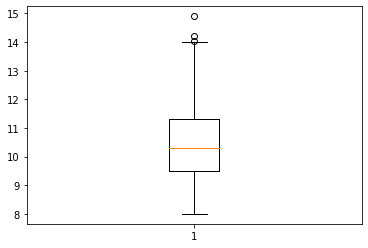

In [14]:
plt.boxplot( wine["alcohol"] )

In [15]:
np.median(wine["alcohol"])

10.3

In [16]:
wine.loc[ pd.isnull( wine['alcohol'] ) , 'alcohol' ] = np.mean(wine["alcohol"])

In [17]:
6 /wine.shape[0]

0.0009235031553024473

In [18]:
w1 =  wine.loc[ : , ['residual sugar', 'density','pH','alcohol'] ].copy()

In [19]:
x = w1["alcohol"]
y = w1["density"]

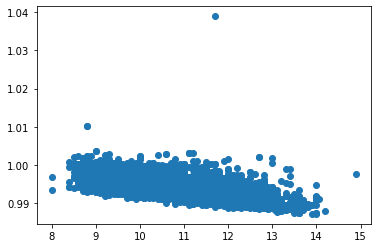

In [20]:
plt.scatter( x , y )

In [21]:
w2 = w1.corr()

In [22]:
w1.corr()

,residual sugar,density,pH,alcohol
residual sugar,1.000000,0.552498,-0.267050,-0.359706
density,0.552498,1.000000,0.011920,-0.686745
pH,-0.267050,0.011920,1.000000,0.121002
alcohol,-0.359706,-0.686745,0.121002,1.000000


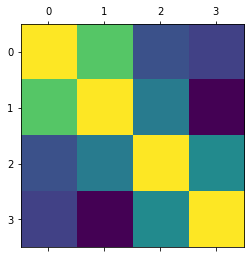

In [23]:
plt.matshow(w2)

In [167]:
w2

,residual sugar,density,pH,alcohol
residual sugar,1.000000,0.552498,-0.267050,-0.359706
density,0.552498,1.000000,0.011920,-0.686745
pH,-0.267050,0.011920,1.000000,0.121002
alcohol,-0.359706,-0.686745,0.121002,1.000000


In [24]:
y = w1["residual sugar"] 
x = w1["pH"]

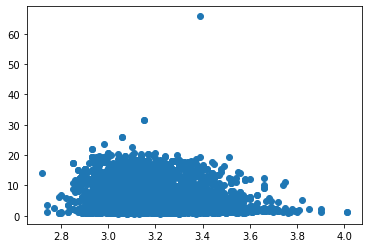

In [25]:
plt.scatter( x , y )


In [26]:
cols_usar = [
   "residual sugar", "density","pH","alcohol" 
]

In [27]:
x = wine.loc[ : , cols_usar ].values

In [28]:
x

array([[20.7    ,  1.001  ,  3.     ,  8.8    ],
       [ 1.6    ,  0.994  ,  3.3    ,  9.5    ],
       [ 6.9    ,  0.9951 ,  3.26   , 10.1    ],
       ...,
       [ 2.3    ,  0.99574,  3.42   , 11.     ],
       [ 2.     ,  0.99547,  3.57   , 10.2    ],
       [ 3.6    ,  0.99549,  3.39   , 11.     ]])

In [29]:
x = np.around( x , 2 )

In [30]:
np.nan_to_num(x)

array([[20.7 ,  1.  ,  3.  ,  8.8 ],
       [ 1.6 ,  0.99,  3.3 ,  9.5 ],
       [ 6.9 ,  1.  ,  3.26, 10.1 ],
       ...,
       [ 2.3 ,  1.  ,  3.42, 11.  ],
       [ 2.  ,  1.  ,  3.57, 10.2 ],
       [ 3.6 ,  1.  ,  3.39, 11.  ]])

In [175]:
pca = PCA( n_components=2)

In [176]:
principalComponents = pca.fit_transform(x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [31]:
wine.drop(['residual sugar', 'density','pH','alcohol'], axis=1)

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality
0,white,7.0,0.270,0.36,0.045,45.0,170.0,0.45,6
1,white,6.3,0.300,0.34,0.049,14.0,132.0,0.49,6
2,white,8.1,0.280,0.40,0.050,30.0,97.0,0.44,6
3,white,7.2,0.230,0.32,0.058,47.0,186.0,0.40,6
4,white,7.2,0.230,0.32,0.058,47.0,186.0,0.40,6
...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,0.090,32.0,44.0,0.58,5
6493,red,5.9,0.550,0.10,0.062,39.0,51.0,NaN,6
6494,red,6.3,0.510,0.13,0.076,29.0,40.0,0.75,6
6495,red,5.9,0.645,0.12,0.075,32.0,44.0,0.71,5


In [65]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categoria,Var_Respuesta
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3,2
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,3
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3,2
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2,3


In [68]:
wine['Var_Respuesta'] = pd.DataFrame(1 if quality >= 5 else 0)

NameError: name 'quality' is not defined

In [72]:
wine.drop(['quality'], axis=1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Categoria,Var_Respuesta
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,3,2
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,3
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2,3
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,2,2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,2


In [73]:
wine.drop(['Categoria'], axis=1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Var_Respuesta
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,3
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,3
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [75]:
features_col = wine.columns.values[0:8]

In [77]:
X = wine[features_col].values
y = wine["Var_Respuesta"].values

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.30, random_state=0)

In [81]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train)

ValueError: could not convert string to float: 'white'